# Exploratory Data Analysis Starter
<!--  -->

## File management

### Import packages

In [1]:
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from IPython.display import display



### Folder and data loading

In [2]:
root = Path("../").resolve()
source = root/"resources" 
path_client_data = source/"client_data.csv"
path_price_data = source/"price_data.csv"

assert path_client_data.exists(), f"Client data file not found at {path_client_data}"
assert path_price_data.exists(), f"Price data file not found at {path_price_data}"


In [3]:
client_df = pl.read_csv(path_client_data, try_parse_dates=True)
price_df = pl.read_csv(path_price_data, try_parse_dates=True)


## Info of the dataframes

In [4]:
def print_polars_shape(df=client_df, df_element_name:str="Clients"):
    table = pl.DataFrame(data=[df.shape], schema=[df_element_name, "Columns"], orient="row")
    display(table)


### Client Dataset

#### Datatypes

In [5]:
client_df.schema

Schema([('id', String),
        ('channel_sales', String),
        ('cons_12m', Int64),
        ('cons_gas_12m', Int64),
        ('cons_last_month', Int64),
        ('date_activ', Date),
        ('date_end', Date),
        ('date_modif_prod', Date),
        ('date_renewal', Date),
        ('forecast_cons_12m', Float64),
        ('forecast_cons_year', Int64),
        ('forecast_discount_energy', Float64),
        ('forecast_meter_rent_12m', Float64),
        ('forecast_price_energy_off_peak', Float64),
        ('forecast_price_energy_peak', Float64),
        ('forecast_price_pow_off_peak', Float64),
        ('has_gas', String),
        ('imp_cons', Float64),
        ('margin_gross_pow_ele', Float64),
        ('margin_net_pow_ele', Float64),
        ('nb_prod_act', Int64),
        ('net_margin', Float64),
        ('num_years_antig', Int64),
        ('origin_up', String),
        ('pow_max', Float64),
        ('churn', Int64)])

In [6]:
client_df.sample(3)


id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
str,str,i64,i64,i64,date,date,date,date,f64,i64,f64,f64,f64,f64,f64,str,f64,f64,f64,i64,f64,i64,str,f64,i64
"""fee545ad6bb727d436a5d4048eef32…","""ewpakwlliwisiwduibdlfmalxowmwp…",43303,0,3483,2011-09-16,2016-08-05,2015-08-05,2014-10-04,5106.99,3483,30.0,142.64,0.157877,0.135732,41.105201,"""f""",459.71,81.9,81.9,1,310.0,4,"""ldkssxwpmemidmecebumciepifcamk…",34.5,0
"""81d479410b1c472be2235cfa32b2b1…","""foosdfpfkusacimwkcsosbicdxkica…",22833,0,2033,2010-01-19,2016-02-16,2010-01-19,2015-02-18,2299.02,2033,0.0,132.15,0.1169,0.100015,40.606701,"""f""",201.58,29.4,29.4,1,257.78,6,"""kamkkxfxxuwbdslkwifmmcsiusiuos…",19.64,0
"""a4198f4690efc4d1b79d7acc03c8c4…","""MISSING""",7473,0,1130,2009-08-24,2016-08-24,2009-08-24,2015-08-25,1111.91,1130,0.0,6.81,0.144902,0.0,44.311378,"""f""",165.61,17.16,17.16,1,105.73,6,"""lxidpiddsbxsbosboudacockeimpue…",14.49,0


#### Analysis

The size of the dataset

In [7]:
print_polars_shape(client_df, "Clients")

Clients,Columns
i64,i64
14606,26


In [8]:
# date_cont_end = pl.col("date_end").str.to_date(format="%Y-%m-%d")
date_cont_end = pl.col("date_end")
year_end = date_cont_end.dt.year().alias("year_end")
month_end = date_cont_end.dt.month().alias("month_end")

client_df.select(pl.col("churn"), year_end, month_end).group_by(pl.col("year_end")).agg(
    pl.col("churn").len().alias("Clients_ended_contract"),
    pl.col("churn").sum().alias("Clients_churned")
    ).sort("year_end", descending=False)

year_end,Clients_ended_contract,Clients_churned
i32,u32,i64
2016,13663,1318
2017,943,101


It is also interesting to see how many unique values are in each column. 

In [9]:
unique_counts = client_df.select([
    pl.col(col).n_unique().alias(f"{col}_n_unique") for col in client_df.columns
])
display(unique_counts)

id_n_unique,channel_sales_n_unique,cons_12m_n_unique,cons_gas_12m_n_unique,cons_last_month_n_unique,date_activ_n_unique,date_end_n_unique,date_modif_prod_n_unique,date_renewal_n_unique,forecast_cons_12m_n_unique,forecast_cons_year_n_unique,forecast_discount_energy_n_unique,forecast_meter_rent_12m_n_unique,forecast_price_energy_off_peak_n_unique,forecast_price_energy_peak_n_unique,forecast_price_pow_off_peak_n_unique,has_gas_n_unique,imp_cons_n_unique,margin_gross_pow_ele_n_unique,margin_net_pow_ele_n_unique,nb_prod_act_n_unique,net_margin_n_unique,num_years_antig_n_unique,origin_up_n_unique,pow_max_n_unique,churn_n_unique
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
14606,8,11065,2112,4751,1796,368,2129,386,13993,4218,12,3528,516,329,41,2,7752,2391,2391,10,11965,13,6,698,2


Fields with a low number of unique values are:  

| Field | Number of unique values |
| :----- | ------------------------: |
| channel_sales | 8 |  
| forecast_discount_energy | 12 |
| has_gas | 2 |
| nb_prod_act | 10  |
| num_years_antig | 13    |
| origin_up | 6  |
| churn | 2  |



+ There are 14606 unique clients, same as  the number of rows in the dataset. This means that for each client there is only one row with all the information of this dataset (No need to group_by "id").  
+ There is field "has_gas" and it is reported the consumption of electricity and gas.  
+ The field "nb_prod_act" (number of active products and services) has 10 unique values. We only know about the electricity and gas consumption. I can not relate this field with the gas and electricity contracts.   


### Price Dataset

#### Datatypes

In [10]:
price_df.schema

Schema([('id', String),
        ('price_date', Date),
        ('price_off_peak_var', Float64),
        ('price_peak_var', Float64),
        ('price_mid_peak_var', Float64),
        ('price_off_peak_fix', Float64),
        ('price_peak_fix', Float64),
        ('price_mid_peak_fix', Float64)])

In [11]:
price_df.sample(3)

id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
str,date,f64,f64,f64,f64,f64,f64
"""6fe25a4bc6ec343fe8db3187dea8b1…",2015-03-01,0.109747,0.096908,0.07073,58.936774,36.344726,8.33426
"""3a87746a9e8781d86804c7f055befd…",2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
"""7e6b8140b261e49bd1f6bfa0326635…",2015-05-01,0.17059,0.087658,0.0,44.266931,0.0,0.0


#### Analysis

In [12]:
print_polars_shape(price_df, "Prices")

Prices,Columns
i64,i64
193002,8


In [13]:
unique_counts = price_df.select([
    pl.col(col).n_unique().alias(f"{col}_n_unique") for col in price_df.columns
])
display(unique_counts)

id_n_unique,price_date_n_unique,price_off_peak_var_n_unique,price_peak_var_n_unique,price_mid_peak_var_n_unique,price_off_peak_fix_n_unique,price_peak_fix_n_unique,price_mid_peak_fix_n_unique
u32,u32,u32,u32,u32,u32,u32,u32
16096,12,1853,1189,711,66,31,28


In price_data.csv there are 16096 unique ids, different than the 14606 unique ids in client_data.csv

The number of unique price_date values is 12, and correspond to the first day of each month during year 2015:

In [14]:
price_df.select(pl.col("price_date").unique().alias("unique_dates")).sort("unique_dates", descending=False).transpose()

column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11
date,date,date,date,date,date,date,date,date,date,date,date
2015-01-01,2015-02-01,2015-03-01,2015-04-01,2015-05-01,2015-06-01,2015-07-01,2015-08-01,2015-09-01,2015-10-01,2015-11-01,2015-12-01


Some clients do not have data points in some months

## Summary

|                        | Client_df | Price_df                  |
| :-----                 | :-----    | ------------------------: |
| Num of clients         | 14606     |                     16096 |  
| churn info             |  yes      |                     no    |
| contract related dates |  yes      |                     no    |
| Temporal data          |  no       |                     yes (Only year 2015)  |

+ Churn data is only in the client dataset  
+ churn = has the client churned over the next 3 months  
+ I have no information relating the field **churn** with the temporal series (Price dataset: year 2015), since the end contract dates are out of the scope of year 2015.
+ **churn**: churned in the next 3 months from what date?  
+ Not all the clients in the Price dataset have information for each month in 2015.

## Statistics

### Client Dataset

In [15]:
client_df.select(pl.all().exclude(["id", "channel_sales"])).describe()


statistic,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,f64,f64
"""count""",14606.0,14606.0,14606.0,"""14606""","""14606""","""14606""","""14606""",14606.0,14606.0,14606.0,14606.0,14606.0,14606.0,14606.0,"""14606""",14606.0,14606.0,14606.0,14606.0,14606.0,14606.0,"""14606""",14606.0,14606.0
"""null_count""",0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0
"""mean""",159220.286252,28092.375325,16090.269752,"""2011-01-28 07:54:18.879000""","""2016-07-27 20:48:26.422000""","""2013-01-02 12:29:10.951000""","""2015-07-21 06:59:00.353000""",1868.61488,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,null,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,null,18.135136,0.097152
"""std""",573465.264198,162973.059057,64364.196422,null,null,null,null,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,null,341.369366,20.231172,20.23028,0.709774,311.79813,1.611749,null,13.534743,0.296175
"""min""",0.0,0.0,0.0,"""2003-05-09""","""2016-01-28""","""2003-05-09""","""2013-06-26""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""f""",0.0,0.0,0.0,1.0,0.0,1.0,"""MISSING""",3.3,0.0
"""25%""",5674.0,0.0,0.0,"""2010-01-15""","""2016-04-27""","""2010-08-12""","""2015-04-17""",494.98,0.0,0.0,16.18,0.11634,0.0,40.606701,null,0.0,14.28,14.28,1.0,50.71,4.0,null,12.5,0.0
"""50%""",14116.0,0.0,793.0,"""2011-03-04""","""2016-08-01""","""2013-06-20""","""2015-07-27""",1113.14,314.0,0.0,18.8,0.143166,0.084138,44.311378,null,37.4,21.64,21.64,1.0,112.56,5.0,null,13.856,0.0
"""75%""",40764.0,0.0,3383.0,"""2012-04-19""","""2016-10-31""","""2015-06-16""","""2015-10-29""",2402.27,1746.0,0.0,131.03,0.146348,0.098837,44.311378,null,193.99,29.88,29.88,1.0,243.13,6.0,null,19.18,0.0
"""max""",6.207104e6,4.15459e6,771203.0,"""2014-09-01""","""2017-06-13""","""2016-01-29""","""2016-01-28""",82902.83,175375.0,30.0,599.31,0.273963,0.195975,59.266378,"""t""",15042.79,374.64,374.64,32.0,24570.65,13.0,"""usapbepcfoloekilkwsdiboslwaxob…",320.0,1.0


We can see that the price_data.csv only includes a period of one year, but client_data.csv has clients that started, modified or ended their contract in different years. To use both datasets, we will need to match clients in both datasets, that did not finished their contract before 2015, so they should have historical price data in price_data.csv

### Price Dataset 

In [16]:
price_df.select(pl.all().exclude("id")).describe()


statistic,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
str,str,f64,f64,f64,f64,f64,f64
"""count""","""193002""",193002.0,193002.0,193002.0,193002.0,193002.0,193002.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2015-06-16 12:50:49.933000""",0.141027,0.05463,0.030496,43.334477,10.622875,6.409984
"""std""",null,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
"""min""","""2015-01-01""",0.0,0.0,0.0,0.0,0.0,0.0
"""25%""","""2015-04-01""",0.125976,0.0,0.0,40.728885,0.0,0.0
"""50%""","""2015-07-01""",0.146033,0.085483,0.0,44.26693,0.0,0.0
"""75%""","""2015-10-01""",0.151635,0.101673,0.072558,44.44471,24.339581,16.226389
"""max""","""2015-12-01""",0.2807,0.229788,0.114102,59.44471,36.490692,17.458221



---
# Data visualization

## Imports

In [17]:
from typing import List, Optional
from matplotlib.axes import Axes
%matplotlib inline

# Set plot style
sns.set_theme(color_codes=True)


## Functions for stacked bar plots

In [18]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
        

def df_stacked_bar_plot(df, x: str, y:List[str], title:str="", ylabel:str ="", ax: Optional[Axes] = None):
    """ 
    Stacked bar plot from a DataFrame.
    -----------------------------------------
    df: DataFrame containing the data to plot
    x: Column name for the x-axis
    y: List of column names for the y-axis
    title: Title of the plot
    ylabel: Label for the y-axis
    ax: Matplotlib axes object to draw on. If None, a new figure and axes are created.
    """

    # If ax is provided, use it; otherwise, create a new figure       
    new_fig = (ax is None)
    if new_fig:
        fig, ax = plt.subplots(figsize=(8, 6)) # figsize es relevante aquí
    plt.sca(ax)

    # Extract the series for x and y from the DataFrame
    serie_x = df[x] 
    serie_y0 = df[y[0]]*0

    # Plot each series in y as a stacked bar
    for yi in y:
        serie_yi = df[yi]
        plt.bar(x=serie_x, height=serie_yi, bottom=serie_y0, width=1)
        serie_y0 += serie_yi

    # Set labels and title
    plt.ylabel(ylabel)
    plt.legend(y, loc="lower right")
    plt.title(title)

    # Adjust x-axis limits for single bar correction
    one_bar_plot_width_correction(serie_x)

    # Only if it has created a new figure
    if new_fig:
        plt.show()


def one_bar_plot_width_correction(x):
    """ Adjusts the x-axis limits for a single bar plot.
    If there is only one bar,
    it sets the x-limits to -1 and 1 for string types,
    or to the minimum and maximum values plus/minus 1 for numeric types.
    """
    if len(x) == 1:
        if type(x[0]) is str:
            plt.xlim(-1, 1)
        
        if type(x[0]) is float or type(x[0]) is int:
            plt.xlim(min(x)-1, max(x)+1)



## Statistics of churning:

shape: (1, 5)
┌───────────┬─────────┬───────┬───────────┬───────────┐
│ n_churned ┆ n_total ┆ Churn ┆ Retention ┆ Companies │
│ ---       ┆ ---     ┆ ---   ┆ ---       ┆ ---       │
│ i64       ┆ u32     ┆ f64   ┆ f64       ┆ str       │
╞═══════════╪═════════╪═══════╪═══════════╪═══════════╡
│ 1419      ┆ 14606   ┆ 9.7   ┆ 90.3      ┆ Companies │
└───────────┴─────────┴───────┴───────────┴───────────┘


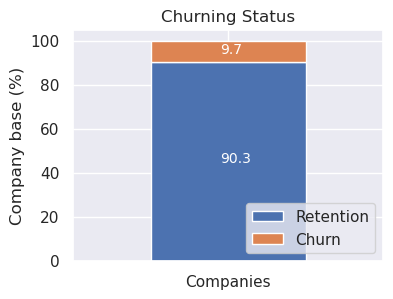

In [19]:
n_churned = pl.col("churn").sum()
n_total = pl.col("churn").count()
perc_churn = n_churned / n_total * 100
perc_retention = 100 - perc_churn

df = client_df.select(
    n_churned.alias("n_churned"),
    n_total.alias("n_total"),
    perc_churn.round(decimals=1).alias("Churn"),
    perc_retention.round(decimals=1).alias("Retention")
    ).with_columns(
        pl.lit("Companies").alias("Companies")
    )
print(df)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
df_stacked_bar_plot(df=df, x="Companies", y=["Retention", "Churn"], title="Churning Status", ylabel="Company base (%)", ax=ax)
annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=10)


## Histogram
A histogram is a graphical representation that shows the distribution of a numerical variable. It divides the range of the variable into intervals (called bins) and displays the number of observations (frequency) that fall into each bin as bars

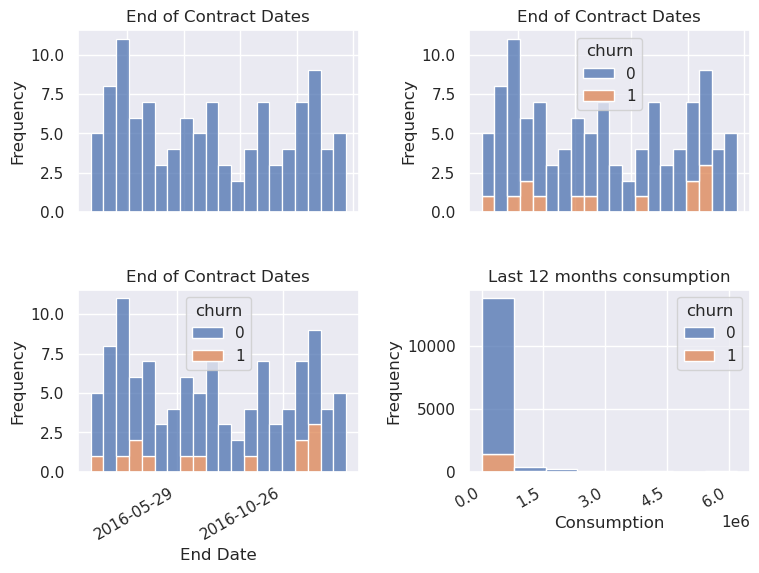

In [20]:
from matplotlib.ticker import MaxNLocator

def df_histogram(df, column: str, hue:Optional[str]=None  ,title: str = "", 
                 nbins:int=20, 
                 xlabel: str = "", ylabel: str = "Frequency", 
                 ax: Optional[Axes] = None, n_xticks:int=5):
    """
    Histogram plot from a DataFrame column.
    -----------------------------------------
    df: DataFrame containing the data to plot
    column: Column name for the histogram
    title: Title of the plot
    nbins: Number of bins for the histogram
    xlabel: Label for the x-axis
    ylabel: Label for the y-axis
    ax: Matplotlib axes object to draw on. If None, a new figure and axes are created.
    n_xticks: Number of x-ticks to display on the x-axis
    """

    # If ax is provided, use it; otherwise, create a new figure       
    new_fig = (ax is None)
    if new_fig:
        fig, ax = plt.subplots(figsize=(8, 6)) # figsize es relevante aquí
    plt.sca(ax)

    # Plot histogram
    if df[column].dtype == pl.Date:
  
        # Convert date to numpy.datetime64 for plotting
        serie = df.select(pl.col(column)).to_numpy().astype('datetime64[D]').flatten()
        hue = df[hue] if hue else None

        sns.histplot(x = serie,
                     hue=hue,
                     multiple="stack",
                     bins=nbins,
                     kde=False, 
                     ax=ax)
        
    else:
        sns.histplot(data=df,
                     x=column,
                     hue=hue,
                     multiple="stack",
                     bins=nbins,
                     kde=False, 
                     ax=ax)

    ax.xaxis.set_major_locator(MaxNLocator(nbins=n_xticks))

    # Set labels and title
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()

    # Only if it has created a new figure
    if new_fig:
        plt.show()

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(8, 6))
# Example usage of df_histogram with date column
df_histogram(client_df[0:110], column="date_end", title="End of Contract Dates", xlabel="End Date", ylabel="Frequency", ax=ax0)
# Example usage of df_histogram with hue
df_histogram(client_df[0:110], column="date_end", hue="churn" ,title="End of Contract Dates", xlabel="End Date", ylabel="Frequency", ax=ax1)
# Example usage of df_histogram with hue and reducing xticks
df_histogram(client_df[0:110], column="date_end", hue="churn" ,title="End of Contract Dates", xlabel="End Date", ylabel="Frequency", ax=ax2,
             n_xticks=3)
# Example usage of df_histogram with numerical series
df_histogram(client_df, column="cons_12m", title="Last 12 months consumption", xlabel="Consumption", ylabel="Frequency",
             nbins=8, n_xticks=5, hue="churn", ax=ax3)
plt.tight_layout()

# Helps with overlapping x-axis labels
fig.autofmt_xdate()

## Time series

In [21]:
date_price = pl.col("price_date")
years_price = date_price.dt.year().alias("year") # extract year
months_price = date_price.dt.strftime("%b").alias("month") # extract month
i_months_price = date_price.dt.month().alias("imonth") # extract month


result = price_df.select([years_price, months_price, i_months_price]).sort("imonth") 
print(result)


shape: (193_002, 3)
┌──────┬───────┬────────┐
│ year ┆ month ┆ imonth │
│ ---  ┆ ---   ┆ ---    │
│ i32  ┆ str   ┆ i8     │
╞══════╪═══════╪════════╡
│ 2015 ┆ Jan   ┆ 1      │
│ 2015 ┆ Jan   ┆ 1      │
│ 2015 ┆ Jan   ┆ 1      │
│ 2015 ┆ Jan   ┆ 1      │
│ 2015 ┆ Jan   ┆ 1      │
│ …    ┆ …     ┆ …      │
│ 2015 ┆ Dec   ┆ 12     │
│ 2015 ┆ Dec   ┆ 12     │
│ 2015 ┆ Dec   ┆ 12     │
│ 2015 ┆ Dec   ┆ 12     │
│ 2015 ┆ Dec   ┆ 12     │
└──────┴───────┴────────┘


In [22]:

def plot_historical_prices(df, x_column:str="price_date"):

    assert isinstance(df, pl.DataFrame)

    # Changes from wide format to long format. 
    df_long = df.unpivot(
        index=x_column,
        variable_name="prices",
        value_name="price_value"
    )

    sns.relplot(data=df_long, 
                    x=x_column, 
                    y="price_value",
                    hue="prices", 
                    kind="line", 
                    aspect=2, 
                    marker="o",
                    )
    


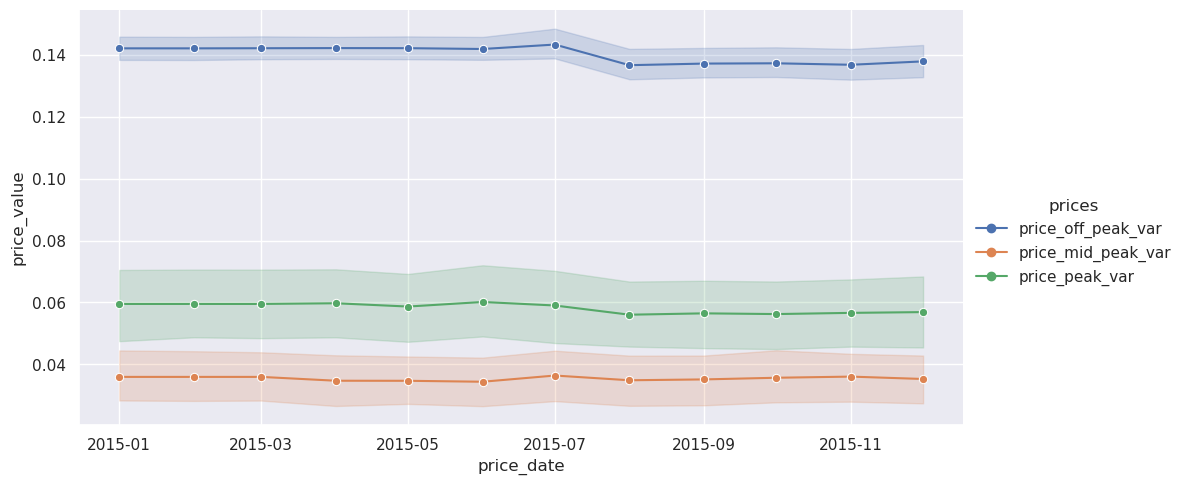

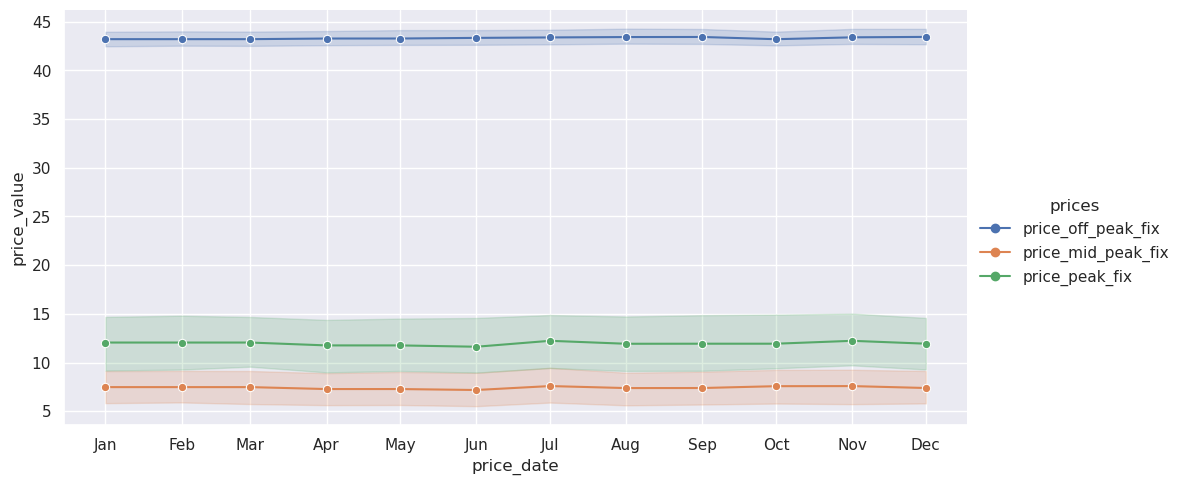

In [23]:
from matplotlib.dates import MonthLocator, DateFormatter

df_var = price_df[0:1000].select(pl.col(
    "price_date",
    "price_off_peak_var",
    "price_mid_peak_var",
    "price_peak_var"
))

df_fix = price_df[0:1000].select(pl.col(
    "price_date",
    "price_off_peak_fix",
    "price_mid_peak_fix",
    "price_peak_fix"
))

plot_historical_prices(df=df_var, x_column="price_date")

plot_historical_prices(df=df_fix, x_column="price_date")
# Get the current axes
ax = plt.gca()
# Set the major x-axis ticks to show the start of each month
ax.xaxis.set_major_locator(MonthLocator(interval=1))
# Set the format to display the full month name
ax.xaxis.set_major_formatter(DateFormatter('%b')) # Use '%b' for abbreviated names (e.g., Jan, Feb)

